# 4. Stitch outputs together
- Once you have fitted the weak, medium and dense diads, stitch them all together, and apply the Ne correction model

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'0.0.91'

In [18]:
# Load in settings, paths, file extensions etc. that you saved in step 1
meta_path, spectra_path, spectra_filetype, prefix, str_prefix, spectra_file_ext, meta_file_ext, TruPower=pf.get_settings()

## Load in specra, and combine

In [19]:
import os
df2=pf.merge_fit_files(path=os.getcwd())
df2.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Diad1_Asym50,Diad1_Asym70,Diad1_Yuan2017_sym_factor,Diad1_Remigi2021_BSF,Diad2_Asym50,Diad2_Asym70,Diad2_Yuan2017_sym_factor,Diad2_Remigi2021_BSF,Diad1_PDF_Model,Diad2_PDF_Model
0,FG04-A1-16-start_CRR_DiadFit,104.135245,0.009106,1284.001648,0.008770,493.139038,1284.001648,1512.124926,1.144462,5.323177,...,1.035821,1.029095,0.081991,0.004642,1.055785,1.002882,0.092209,0.001571,PseudoVoigtModel,PseudoVoigtModel
1,FG04-A1-4-start,104.565051,0.007363,1283.074215,0.007002,647.240115,1283.074215,1826.543342,0.981600,6.318512,...,1.055749,1.080605,0.109447,0.003033,1.006135,1.038905,0.010036,0.001258,PseudoVoigtModel,PseudoVoigtModel
2,919_55_A_CRR_DiadFit,103.172162,0.008526,1286.220958,0.007945,407.803008,1286.221008,653.358969,0.563917,4.930775,...,1.131902,1.099119,0.148763,0.002766,1.246429,1.263158,0.230341,0.001344,PseudoVoigtModel,PseudoVoigtModel
3,919_55_B_CRR_DiadFit,103.185419,0.003859,1286.193200,0.003501,609.390266,1286.193250,883.973640,0.550277,3.001334,...,1.108280,1.094037,0.119168,0.001806,1.216495,1.215426,0.206144,0.000885,PseudoVoigtModel,PseudoVoigtModel
4,919_56_A_drift,103.612090,0.004863,1285.140945,0.004341,936.910518,1285.140995,2196.341459,0.864942,5.375435,...,1.150313,1.200617,0.260024,0.001846,1.049628,1.083955,0.065995,0.000709,PseudoVoigtModel,PseudoVoigtModel


## First, get the metadata for this day

In [20]:
# Put the common string you can in all your Ne lines here
diad_meta=pf.get_files(path=meta_path,
file_ext=meta_file_ext, exclude_str=['Ne', 'Cap','window'],
 sort=True)
diad_meta[0]

'002 FG04-A1-16-start.txt'

## Now get all the important information out of the metadata files

In [21]:
# This will only work for WITEC - for other vendors, you might have to use the file datastamp. See the HORIBA example
meta=pf.stitch_metadata_in_loop_witec(path=meta_path, 
Allfiles=diad_meta, prefix=prefix, str_prefix=str_prefix,
trupower=TruPower)
meta.head()

100%|██████████| 105/105 [00:00<00:00, 1250.03it/s]

Done


,filename,date,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,FG04-A1-16-start.txt,"June 7, 2024\n",June,7.0,6.066,45.0,5.0,50.0,"['0h', '3m', '46s']",7:30:15 AM\n,27015.0,1324.964
1,FG04-A1-4-start.txt,"June 7, 2024\n",June,7.0,6.017,45.0,5.0,50.0,"['0h', '3m', '46s']",7:36:45 AM\n,27405.0,1324.964
2,919_55_A.txt,"June 7, 2024\n",June,7.0,12.041,60.0,4.0,50.0,"['0h', '4m', '2s']",7:47:35 AM\n,28055.0,1324.964
3,919_55_B.txt,"June 7, 2024\n",June,7.0,12.131,60.0,4.0,50.0,"['0h', '4m', '1s']",7:52:51 AM\n,28371.0,1324.964
4,919_56_A_drift.txt,"June 7, 2024\n",June,7.0,12.261,60.0,4.0,50.0,"['0h', '4m', '1s']",8:04:51 AM\n,29091.0,1324.964


## Then get a simple file name you can stitch with the spectra

In [22]:
file_m=pf.extracting_filenames_generic(names=meta['filename'],
   file_ext=meta_file_ext)
# Checks they are all unique
file_m[0]

good job, no duplicate file names


'FG04-A1-16-start'

## Now get filename from spectra into same form as metadata

In [23]:
# Remove these to get the pure file name
file_s=pf.extracting_filenames_generic(
    names=df2['filename'].reset_index(drop=True),
   file_ext=spectra_file_ext)

# Remove the cosmic rays, as doesnt have it in the metatdata
file_s = np.char.replace(file_s.astype(str), "_CRR_DiadFit", "")
print(file_s[0])

good job, no duplicate file names
FG04-A1-16-start


In [24]:
# Combining them together, if the form above matches, e.g. checking one doesnt have a suffix and the other one does

meta['filename']=file_m
df2['filename']=file_s
df_combo=pd.merge(df2, meta, on='filename').reset_index(drop=True)
df_combo.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,FG04-A1-16-start,104.135245,0.009106,1284.001648,0.008770,493.139038,1284.001648,1512.124926,1.144462,5.323177,...,June,7.0,6.066,45.0,5.0,50.0,"['0h', '3m', '46s']",7:30:15 AM\n,27015.0,1324.964
1,FG04-A1-4-start,104.565051,0.007363,1283.074215,0.007002,647.240115,1283.074215,1826.543342,0.981600,6.318512,...,June,7.0,6.017,45.0,5.0,50.0,"['0h', '3m', '46s']",7:36:45 AM\n,27405.0,1324.964
2,919_55_A,103.172162,0.008526,1286.220958,0.007945,407.803008,1286.221008,653.358969,0.563917,4.930775,...,June,7.0,12.041,60.0,4.0,50.0,"['0h', '4m', '2s']",7:47:35 AM\n,28055.0,1324.964
3,919_55_B,103.185419,0.003859,1286.193200,0.003501,609.390266,1286.193250,883.973640,0.550277,3.001334,...,June,7.0,12.131,60.0,4.0,50.0,"['0h', '4m', '1s']",7:52:51 AM\n,28371.0,1324.964
4,919_56_A_drift,103.612090,0.004863,1285.140945,0.004341,936.910518,1285.140995,2196.341459,0.864942,5.375435,...,June,7.0,12.261,60.0,4.0,50.0,"['0h', '4m', '1s']",8:04:51 AM\n,29091.0,1324.964


## If you have secondary phases, now is the time to merge those in

In [25]:
df_combo_sec_phase=pf.merge_in_carb_SO2(
df_combo=df_combo, file1_name='Carb_Peak_fits.xlsx', file2_name='SO2_Peak_fits.xlsx', 
prefix=prefix, str_prefix=str_prefix, file_ext=spectra_file_ext)
#df_combo_sec_phase.to_excel('FI_fitting_w_sec_phases.xlsx', index=False)

Made a df!
good job, no duplicate file names


## If you have SO2, now is the time to calculate the molar proportion of SO2

In [26]:
if 'Peak_Area_SO2' in df_combo_sec_phase:
    

        SO2_mol_ratio=pf.calculate_SO2_CO2_ratio(SO2_area=df_combo_sec_phase['Peak_Area_SO2'], 
        diad1_area=df_combo_sec_phase['Diad1_Voigt_Area'], diad2_area=df_combo_sec_phase['Diad2_Voigt_Area'], 
                SO2_cross_sec=5.3, diad1_cross_sec=0.89, diad2_cross_sec=1.4)
        

        df_combo_sec_phase['SO2_mol_ratio']=SO2_mol_ratio

## Now we calculate the density using the UC Berkeley Densimeter. 
- If you have your own densimeter, I am happy to add a function for it if you email me (penny_wieser@berkeley.edu)
- This particular function propagates the uncertainty on 1) The neon line correction model 2) the peak fits of the diads themselves 3) The densimeter. 

In [27]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

7.471832607845582e-06


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Peak_Area_Carb,Peak_Height_Carb,Model_name_y,Carb_Diad_Ratio,SO2_Diad_Ratio,SO2_mol_ratio,time,preferred_values,lower_values,upper_values
0,FG04-A1-16-start,0.495781,0.004833,0.004221,0.002355,103.925956,0.009122,0.000790,0.009106,6.066,...,NaN,NaN,NaN,NaN,NaN,NaN,27015.0,0.997990,0.997983,0.997998
1,FG04-A1-4-start,0.704530,0.004485,0.003792,0.002394,104.354759,0.007390,0.000790,0.007363,6.017,...,NaN,NaN,NaN,NaN,NaN,NaN,27405.0,0.997989,0.997981,0.997996
2,919_55_A,0.084871,0.005090,0.003385,0.003801,102.964445,0.008544,0.000775,0.008526,12.041,...,NaN,NaN,NaN,NaN,NaN,NaN,28055.0,0.997987,0.997979,0.997994
3,919_55_B,0.090070,0.004107,0.001556,0.003801,102.977567,0.003928,0.000773,0.003859,12.131,...,NaN,NaN,NaN,NaN,NaN,NaN,28371.0,0.997986,0.997978,0.997993
4,919_56_A_drift,0.266170,0.003128,0.002058,0.002356,103.403134,0.004914,0.000772,0.004863,12.261,...,4431.643172,264.325514,Spline,0.797541,NaN,NaN,29091.0,0.997983,0.997976,0.997991


In [28]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

7.471832607845582e-06


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Peak_Area_Carb,Peak_Height_Carb,Model_name_y,Carb_Diad_Ratio,SO2_Diad_Ratio,SO2_mol_ratio,time,preferred_values,lower_values,upper_values
0,FG04-A1-16-start,0.495781,0.004833,0.004221,0.002355,103.925956,0.009122,0.000790,0.009106,6.066,...,NaN,NaN,NaN,NaN,NaN,NaN,27015.0,0.997990,0.997983,0.997998
1,FG04-A1-4-start,0.704530,0.004485,0.003792,0.002394,104.354759,0.007390,0.000790,0.007363,6.017,...,NaN,NaN,NaN,NaN,NaN,NaN,27405.0,0.997989,0.997981,0.997996
2,919_55_A,0.084871,0.005090,0.003385,0.003801,102.964445,0.008544,0.000775,0.008526,12.041,...,NaN,NaN,NaN,NaN,NaN,NaN,28055.0,0.997987,0.997979,0.997994
3,919_55_B,0.090070,0.004107,0.001556,0.003801,102.977567,0.003928,0.000773,0.003859,12.131,...,NaN,NaN,NaN,NaN,NaN,NaN,28371.0,0.997986,0.997978,0.997993
4,919_56_A_drift,0.266170,0.003128,0.002058,0.002356,103.403134,0.004914,0.000772,0.004863,12.261,...,4431.643172,264.325514,Spline,0.797541,NaN,NaN,29091.0,0.997983,0.997976,0.997991


### This cell saves the merged together dataframe with the folder name and the date you fitted it

In [29]:

from datetime import date
today = date.today()
today_str = today.strftime("%Y-%m-%d")
sorted_df = df.sort_values('sec since midnight')
date=meta['date'].iloc[0].replace('\n', '')
name='Raman_session_'+date+'_fitted_'+today_str+'.xlsx'
print(name)
sorted_df.to_excel(name)

Raman_session_June 7, 2024_fitted_2024-06-07.xlsx


## This helps visualize the errors on each spectra 

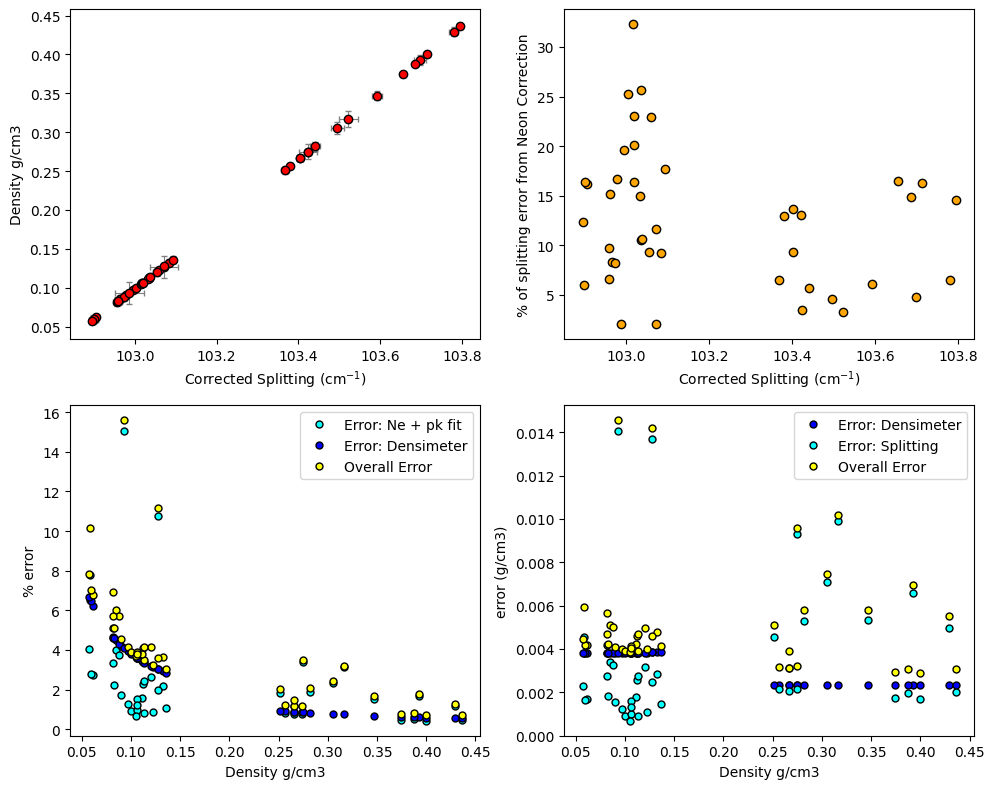

In [30]:
df=sorted_df[~(sorted_df['filename'].str.contains('FG'))]
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,8))
df=df.loc[df['Density g/cm3']>0]
ax1.errorbar(df['Corrected_Splitting'], df['Density g/cm3'],
xerr=df['Corrected_Splitting_σ'], yerr=df['σ Density g/cm3'],
fmt='o', ecolor='grey', elinewidth=0.8, mfc='red', ms=6, mec='k', capsize=2)
ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('Density g/cm3')

ax2.plot(df['Corrected_Splitting'], 
100*df['Corrected_Splitting_σ_Ne']/(df['Corrected_Splitting_σ_Ne']+df['Corrected_Splitting_σ_peak_fit']),
 'ok', mfc='orange')
ax2.set_ylabel('% of splitting error from Neon Correction')
ax2.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from Ne+peakfit)']/df['Density g/cm3'], 
'ok', mfc='cyan', ms=5, label='Error: Ne + pk fit')


ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from densimeter)']/df['Density g/cm3'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')

ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3']/df['Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax3.set_ylabel('% error')
ax3.set_xlabel('Density g/cm3')
ax3.legend()

ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from densimeter)'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from Ne+peakfit)'], 
'ok', mfc='cyan', ms=5, label='Error: Splitting')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax4.set_ylabel('error (g/cm3)')
ax4.set_xlabel('Density g/cm3')
ax4.legend()

fig.tight_layout()

## If you were analysing fluid inclusions, lets calculate their pressures
- This bit isn't valid for melt inclusion vapour bubbles. 

Text(0, 0.5, '# of FI')

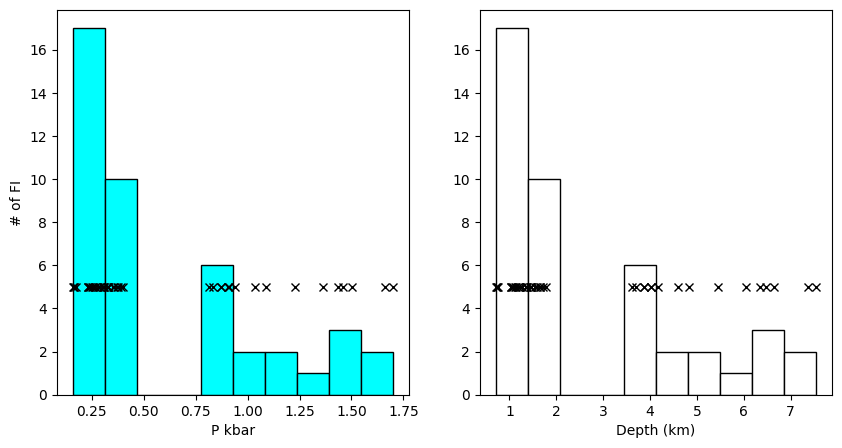

In [31]:
# Calculate pressure with a temperature estimate


Temp_C=1150
Pressure_SW96=pf.calculate_P_for_rho_T(T_K=Temp_C+273.15,
                CO2_dens_gcm3=df['Density g/cm3'],
                 EOS='SW96')
# Calculate depth from a crustal density assumption
Depth=pf.convert_pressure_to_depth(P_kbar=Pressure_SW96['P_kbar'], 
                crust_dens_kgm3=2300)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.hist(Pressure_SW96['P_kbar'], ec='k', fc='cyan', bins=10)
ax1.plot(Pressure_SW96['P_kbar'], Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.plot(Depth, Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.hist(Depth, ec='k', fc='white', bins=10)
ax1.set_xlabel('P kbar')
ax2.set_xlabel('Depth (km)')
ax1.set_ylabel('# of FI')